<h1>Kapitel 13 Mer om Regressionsanalys</h1>

In [4]:
#importera paket och exempeldata 
import numpy as np
import pandas as pd
import scipy.stats as scs 

import matplotlib.pyplot as plt
import seaborn as sns

# import statsmodels.api as sm
from statsmodels.formula.api import ols

# importera palmer penguins
filepath = '../Dataset/penguins.csv'
penguins = pd.read_csv(filepath)
penguins = penguins.dropna().reset_index() # Plocka bort rader som innehåller NaN

In [5]:
penguins = penguins.sample(30)
penguins.head()

,index,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
288,299,Chinstrap,Dream,50.6,19.4,193.0,3800.0,male,2007
14,19,Adelie,Torgersen,46.0,21.5,194.0,4200.0,male,2007
113,119,Adelie,Torgersen,41.1,18.6,189.0,3325.0,male,2009
127,133,Adelie,Dream,37.5,18.5,199.0,4475.0,male,2009
266,277,Chinstrap,Dream,50.0,19.5,196.0,3900.0,male,2007


<h3>Korrelationstest med scipy.stats</h3>

In [6]:
r, p = scs.pearsonr(penguins['flipper_length_mm'], penguins['body_mass_g'])
r, p

(0.9196652237409603, 6.95117583698876e-13)

<h3>Konfidensintervall och hypotestest för koefficienterna i regressionsmodellen</h3>

In [7]:
model = ols('flipper_length_mm ~ body_mass_g', data=penguins).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      flipper_length_mm   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     153.6
Date:                Thu, 02 Feb 2023   Prob (F-statistic):           6.95e-13
Time:                        10:06:13   Log-Likelihood:                -92.849
No. Observations:                  30   AIC:                             189.7
Df Residuals:                      28   BIC:                             192.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     137.1923      5.326     25.757      

<h3>Prediktionsintervall in sample-prediktion</h3>

In [10]:
predictions = model.get_prediction(penguins['body_mass_g'])

frame=predictions.summary_frame(alpha=0.05)
ypred=frame['mean']

frame[['obs_ci_lower','obs_ci_upper']]

,obs_ci_lower,obs_ci_upper
0,181.725254,204.940153
1,187.714515,210.769932
2,174.508271,198.122026
3,191.784308,214.825730
4,183.230241,206.389927
5,203.760750,227.226059
6,185.478157,208.574150
7,195.814998,218.920630
8,189.198968,212.240240
9,188.457388,211.504440


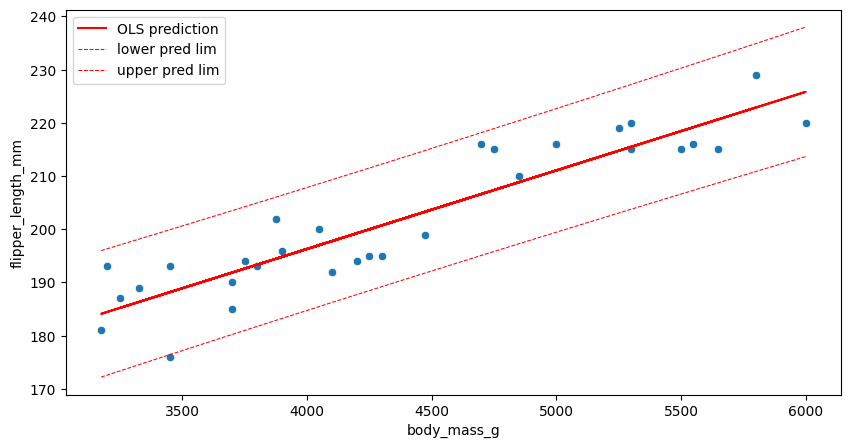

In [12]:
order = np.argsort(penguins['body_mass_g'])
xs = np.array(penguins['body_mass_g'])[order]
#ys = np.array(frame['obs_ci_lower'])[order]

fig, ax = plt.subplots(figsize=(10,5))

sns.scatterplot(data=penguins, x='body_mass_g', y='flipper_length_mm')
ax.plot(penguins['body_mass_g'], ypred, "r", label="OLS prediction")

order = np.argsort(penguins['body_mass_g'])
x = np.array(penguins['body_mass_g'])[order]
lower = np.array(frame['obs_ci_lower'])[order]
upper = np.array(frame['obs_ci_upper'])[order]

ax.plot(xs, lower, 'r--', label="lower pred lim", linewidth=0.75)
ax.plot(xs, upper, 'r--', label="upper pred lim", linewidth=0.75)


ax.legend(loc="best")
plt.show()

<h3>Prediktionsintervall out of sample-prediktion</h3>

      body_mass_g
0        0.000000
1      151.057402
2      302.114804
3      453.172205
4      604.229607
..            ...
327  49395.770393
328  49546.827795
329  49697.885196
330  49848.942598
331  50000.000000

[332 rows x 1 columns]


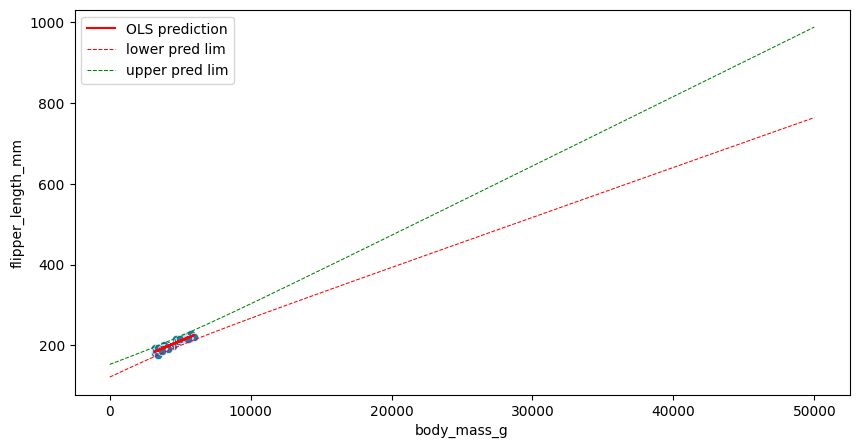

In [14]:
xs = pd.DataFrame(np.linspace(0,50000,332), columns=['body_mass_g'])
print(xs)

predictions = model.get_prediction(xs)
frame = predictions.summary_frame(alpha=0.05)
lower = frame['obs_ci_lower']
upper = frame['obs_ci_upper']

fig, ax = plt.subplots(figsize=(10,5))

sns.scatterplot(data=penguins, x='body_mass_g', y='flipper_length_mm')
ax.plot(penguins['body_mass_g'], ypred, "r", label="OLS prediction")

ax.plot(xs, lower, 'r--', label="lower pred lim", linewidth=0.75)
ax.plot(xs, upper, 'g--', label="upper pred lim", linewidth=0.75)

ax.legend(loc="best")
plt.show()